In [1]:
library(tidyverse)
library(microbiome)
library(phyloseq)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: 'microbiome'




In [2]:
phyloseq_12S <- readr::read_rds("phyloseq_12S.rds")

In [3]:
(sample_totals  <- phyloseq::sample_sums(phyloseq_12S) |>
                  data.frame() |> 
                  `colnames<-`(c("total_reads")) |>
                  dplyr::arrange(total_reads) |>
                  tibble::rownames_to_column(var = "sample_names"))

sample_names,total_reads
<chr>,<dbl>
eDNA_0046_12S_S013,0
eDNA_0046_12S_S016,0
eDNA_0046_12S_S036,0
eDNA_0046_12S_S037,0
eDNA_0046_12S_S038,0
eDNA_0046_12S_S044,0
eDNA_0046_12S_S045,2
eDNA_0046_12S_S063,6
eDNA_0046_12S_S051,82


In [4]:
#extract none zero counts
(non_zero_samples <-  sample_totals[sample_totals$total_reads != 0,] )

,sample_names,total_reads
,<chr>,<dbl>
7,eDNA_0046_12S_S045,2
8,eDNA_0046_12S_S063,6
9,eDNA_0046_12S_S051,82
10,eDNA_0046_12S_S019,98
11,eDNA_0046_12S_S014,114
12,eDNA_0046_12S_S035,525
13,eDNA_0046_12S_S040,763
14,eDNA_0046_12S_S034,999
15,eDNA_0046_12S_S009,1463


In [5]:
(phyloseq_12S_clean <- phyloseq::prune_samples(non_zero_samples$sample_names,  phyloseq_12S))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 174 taxa and 24 samples ]
sample_data() Sample Data:       [ 24 samples by 18 sample variables ]
tax_table()   Taxonomy Table:    [ 174 taxa by 6 taxonomic ranks ]

In [6]:
#convert read counts to presence and absences
phyloseq_12S_pa <- microbiome::transform(phyloseq_12S_clean, transform = "pa")

In [7]:
phyloseq::sample_data(phyloseq_12S_clean) |>  head()

,SampleID_for_DataAnalysis,Original_SampleName,I7_Index_ID,index,I5_Index_ID,index2,I7_Index_ID.1,index3,I5_Index_ID.1,index4,Location,Average_depths,Average_water_temp,Wildlife_seen,DNA_conc_after_1stPCR..ng.ul.,total_reads,dilution_ratio,X19
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
eDNA_0046_12S_S009,S009,dH2O ABS,eDNA1st_Elas02-f_IPg0009_F,TAGATTTA,eDNA1st_Elas02-r_IPg009_R,TAGATTTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,0.1472174,1805,1/1,NA
eDNA_0046_12S_S010,S010,dH2O DBS,eDNA1st_Elas02-f_IPg0010_F,AATGCGTA,eDNA1st_Elas02-r_IPg010_R,AATGCGTA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,1.3211515,6538,1/1,NA
eDNA_0046_12S_S011,S011,dH2O FBS,eDNA1st_Elas02-f_IPg0011_F,CATAAGCA,eDNA1st_Elas02-r_IPg011_R,CATAAGCA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,1.3718793,39935,1/1,NA
eDNA_0046_12S_S012,S012,dH2O GBS,eDNA1st_Elas02-f_IPg0012_F,CGTGTTGT,eDNA1st_Elas02-r_IPg012_R,CGTGTTGT,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,0.6299005,7196,1/1,NA
eDNA_0046_12S_S014,S014,dH2O PBS,eDNA1st_Elas02-f_IPg0014_F,GCTACGAA,eDNA1st_Elas02-r_IPg014_R,GCTACGAA,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,0.2663063,117,1/1,NA
eDNA_0046_12S_S015,S015,dH2O PNS,eDNA1st_Elas02-f_IPg0015_F,ACCCTGGT,eDNA1st_Elas02-r_IPg015_R,ACCCTGGT,PCR_IPg0183_R,CTGAAAAG,PCR_IPg0183_F,CTTTTCAG,Field blank,NA,NA,NA,1.6995953,18093,1/1,NA


In [8]:
ord_jaccard <- ordinate(phyloseq_12S_pa, "PCoA", "jaccard")

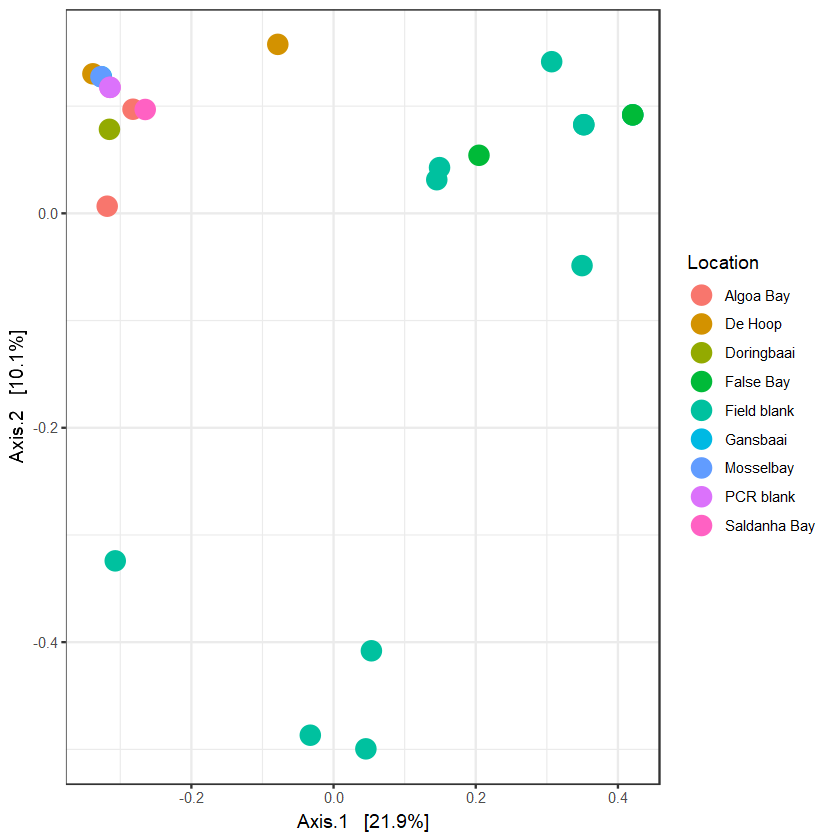

In [9]:
plot_ordination(phyloseq_12S_clean, ord_jaccard, color = "Location") + geom_point(size = 5) + theme_bw()